In [4]:
import numpy as np
import pandas as pd

import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.graph_objs import *
import colorlover as cl
from plotly import tools

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import style
style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False



In [5]:
data = pd.read_csv('./creditcardfraud.csv')
data.shape

(284807, 31)

In [6]:
# 检查是否有空值
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.tail(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.353722,0.488487,0.293632,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0
284788,172770.0,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
284790,172771.0,-0.515513,0.971950,-1.014580,-0.677037,0.912430,-0.316187,0.396137,0.532364,-0.224606,...,-0.280302,-0.849919,0.300245,0.000607,-0.376379,0.128660,-0.015205,-0.021486,9.81,0
284791,172774.0,-0.863506,0.874701,0.420358,-0.530365,0.356561,-1.046238,0.757051,0.230473,-0.506856,...,-0.108846,-0.480820,-0.074513,-0.003988,-0.113149,0.280378,-0.077310,0.023079,20.32,0
284792,172774.0,-0.724123,1.485216,-1.132218,-0.607190,0.709499,-0.482638,0.548393,0.343003,-0.226323,...,0.414621,1.307511,-0.059545,0.242669,-0.665424,-0.269869,-0.170579,-0.030692,3.99,0
284793,172775.0,1.971002,-0.699067,-1.697541,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,...,0.188758,0.694418,0.163002,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0


Text(0, 0.5, 'Frequency')

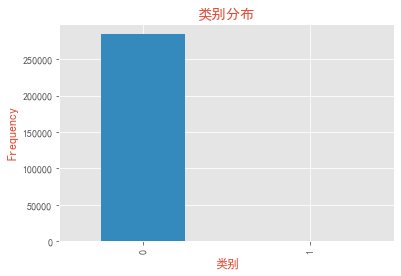

In [8]:
# 查看类别分布
count_classes = data.Class.value_counts()
count_classes.plot(kind='bar', color=['C8', 'C1'])
plt.title('类别分布', color='C0')
plt.xlabel('类别', color='C0')
plt.ylabel('Frequency', color='C0')


In [9]:
# 查看异常交易记录
all_normal = data[data['Class'] == 0]
all_fraud = data[data['Class'] == 1]
print('正常交易的记录有{}条'.format(all_normal.shape[0]))
print('异常交易的记录有{}条'.format(all_fraud.shape[0]))
print('异常交易记录比率{0:.3%}'.format(all_fraud.shape[0]/all_normal.shape[0]))

正常交易的记录有284315条
异常交易的记录有492条
异常交易记录比率0.173%


In [10]:
# 探索交易时间分布
print("正常交易的时间描述信息\n",all_normal.Time.describe())
print("异常交易的时间描述信息\n",all_fraud.Time.describe())

正常交易的时间描述信息
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64
异常交易的时间描述信息
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


<AxesSubplot:title={'center':'正常交易时间分布'}, ylabel='Frequency'>

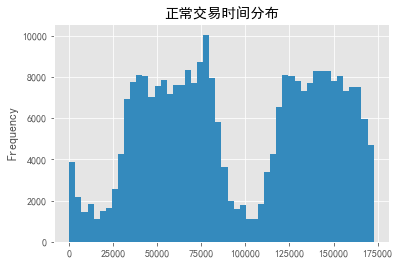

In [11]:
all_normal.Time.plot(kind='hist', bins=50, title='正常交易时间分布', color='C8')

<AxesSubplot:title={'center':'异常交易时间分布'}, ylabel='Frequency'>

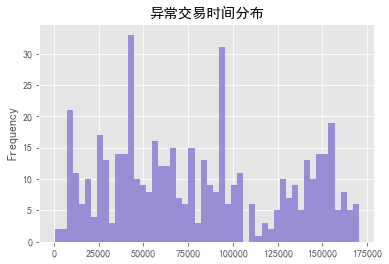

In [12]:
all_fraud.Time.plot(kind='hist', bins=50, title='异常交易时间分布', color='C9')

可以看出正常的交易记录是呈周期性分布的，而异常交易分布较平均。所以可以从交易周期的低频段入手欺诈交易的检测。

In [13]:
# 探索交易金额分布
print("正常交易的金额描述信息\n",all_normal.Amount.describe())
print("异常交易的金额描述信息\n",all_fraud.Amount.describe())

正常交易的金额描述信息
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
异常交易的金额描述信息
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Text(0, 0.5, '交易次数')

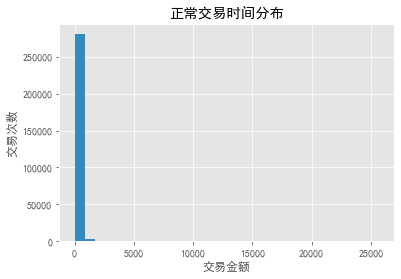

In [14]:
ax = all_normal.Amount.plot(kind='hist', bins=30, title='正常交易时间分布', color='C8')
ax.set_xlabel('交易金额')
ax.set_ylabel('交易次数')

Text(0, 0.5, '交易次数')

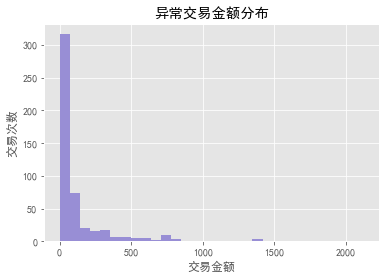

In [15]:
ax = all_fraud.Amount.plot(kind='hist', bins=30, title='异常交易金额分布', color='C9')
ax.set_xlabel('交易金额')
ax.set_ylabel('交易次数')

## 数据预处理
### 标准化
鉴于`Amount`列特征值的取值范围相比于PCA处理过的其他28列（V1至V28）特征值取值范围相差很大，需统一标准即标准化处理，以此来消除内部构成不同造成的对结果的影响。

In [16]:
from sklearn.preprocessing import StandardScaler
# reshape(-1,1) 将data['Amount']变成只有一列，行数不限定的np.array
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data['normAmount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: normAmount, Length: 284807, dtype: float64

In [17]:
# 删掉不需要用到的2列数据
new_data = data.drop(['Time', 'Amount'], axis=1)
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [18]:
# 使用SMOTE平衡样本
X = np.array(new_data.iloc[:, new_data.columns != 'Class']) # 选取特征列数据
y = np.array(new_data.iloc[:, new_data.columns == 'Class']) # 选取类别label
X.shape, y.shape

((284807, 29), (284807, 1))

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

### 1. 对所有数据进行训练集与测试集的切分
### 2. 先对数据进行上采样，然后对上采样后的数据进行训练集与测试集的切分

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('训练集的交易记录条数：',X_train.shape[0])
print('测试集的交易记录条数：',X_test.shape[0])
print('交易记录总数：',X_train.shape[0] + X_test.shape[0])
print('上采样前，类别为‘1’的共有{}个，类别为‘0’的共有{}个。'.format(sum(y_train==1),sum(y_train==0)))
print('------------------------')

# 对训练集进行上采样处理
smote = SMOTE(random_state=2)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train.ravel()) # ravel(): change the shape of y to (n_samples, )

print('上采样后，训练集的交易记录条数：', len(X_train_os))
print('其中，训练集X的shape:',X_train_os.shape,'，y的shape:',y_train_os.shape)
print('交易记录总数：',X_train_os.shape[0] + X_test.shape[0])
print('上采样后，类别为‘1’的共有{}个，类别为‘0’的共有{}个。'.format(sum(y_train_os==1),sum(y_train_os==0)))

训练集的交易记录条数： 199364
测试集的交易记录条数： 85443
交易记录总数： 284807
上采样前，类别为‘1’的共有[345]个，类别为‘0’的共有[199019]个。
------------------------
上采样后，训练集的交易记录条数： 398038
其中，训练集X的shape: (398038, 29) ，y的shape: (398038,)
交易记录总数： 483481
上采样后，类别为‘1’的共有199019个，类别为‘0’的共有199019个。


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, recall_score, classification_report

In [24]:
# 定义正则化权重参数， 用以控制过拟合
paramaters = {'C':np.linspace(1, 10, num=10)}
paramaters

{'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}

In [27]:
lr = LogisticRegression()
lr_clf = GridSearchCV(lr, paramaters, cv=5, n_jobs=3, verbose=5)
lr_clf.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [28]:
lr_clf.best_params_

{'C': 9.0}

In [32]:
lr1 = LogisticRegression(C=9, penalty='l2', verbose=5)
lr1.fit(X_train_os, y_train_os.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


LogisticRegression(C=9, verbose=5)

In [34]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 92.17391304347827%


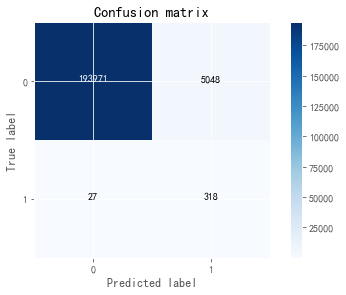

In [35]:
# 对原训练集X进行预测
y_train_pre = lr1.predict(X_train)

# 训练集的混淆矩阵
cnf_matrix_train = confusion_matrix(y_train, y_train_pre)
print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1])))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_name, title='Confusion matrix')


Recall metric in the train dataset: 91.83673469387755%


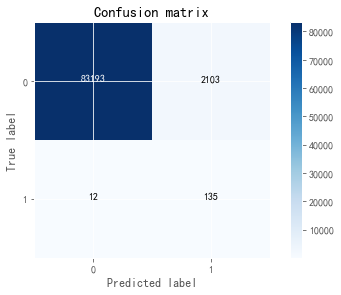

In [37]:
# 对原训练集X进行预测
y_pre = lr1.predict(X_test)

# 训练集的混淆矩阵
cnf_matrix_train = confusion_matrix(y_test, y_pre)
print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1])))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train, classes=class_name, title='Confusion matrix')


In [38]:
# 用上采样处理后的训练集训练模型
model = lr1.fit(X_train_os, y_train_os.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


In [39]:
y_pred_sample_score = model.decision_function(X_test)
y_pred_sample_score

array([-1.60101245, -1.54059716, -1.6368512 , ..., -3.07786603,
       -2.16587243, -1.91329703])

## ROC评估

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr, tpr)
roc_auc

0.9840835977985266

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right') # 设置图例位置
plt.plot([0,1], [0,1], 'r--')